# Функции и библиотеки

In [51]:
from graphlib.structures import Graph
from graphlib.algorithms import DFS_with_cc, BFS_search
from graphlib.tools import radius_approximate, diameter_approximate, density

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Загрузка данных, количество ребер и вершин; плотность

In [36]:
%%time

G = Graph('CO-Astro')
with open('./datasets/CA-AstroPh.txt', mode='r') as f:
    for line in f:
        u, v = line.split()
        G.add_edge(u, v)
print(G)

print('Плотность графа: ', density(G))

Граф <CO-Astro> с 18772 вершинами and 198110 ребрами
Плотность графа:  1.0095452503419835e-05
Wall time: 555 ms


# Количество компонент связности, характеристики наибольшей компоненты

In [37]:
%%time

number, largest_index, components = DFS_with_cc(G, largest=True)
largest_component = G.subgraph(nodes=components[largest_index])
print(largest_component)

Граф <подграф::CO-Astro> с 17903 вершинами and 197031 ребрами
Wall time: 181 ms


In [38]:
nodes_in_largest_component = largest_component.nodes
print(f'Доля вершин в наибольшей компоненте слабой связности: {round(largest_component.nodes_count / G.nodes_count, 3)}')

Доля вершин в наибольшей компоненте слабой связности: 0.954


## Доля вершин в компоненте слабой связности при удалении 'x' случайных вершин

Wall time: 811 ms


Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

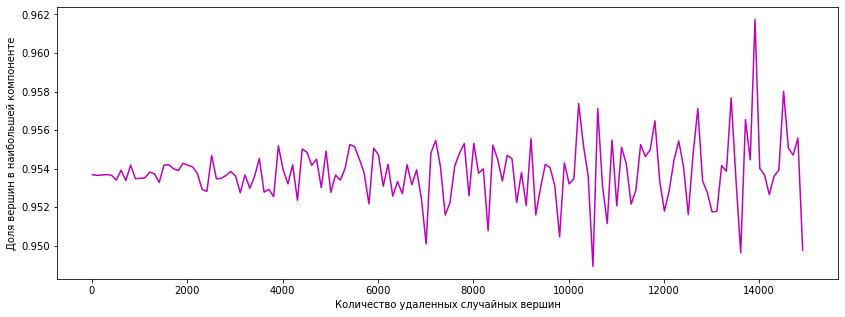

In [60]:
%%time

number_of_removing = np.arange(10, 15000, 100)
props = []
for n in number_of_removing:
    removing_nodes = G.selection(x=n,
                                 most_degree=False)
    tmp_set = nodes_in_largest_component - removing_nodes
    proportion = len(tmp_set) / (G.nodes_count-n)
    props.append(proportion)
    
#     print(f'После удаления {n} случайных вершин:')
#     print(f'--- осталось {len(tmp_set)} вершин')
#     print(f'--- доля {round(proportion, 5)}')
#     print()
    ## спросить: мы считаем долю в модифицированном графе? То есть в том графе, из которого удалили вершины?
    ## или же нужно считать долю в исходном графе?
    

plt.figure(figsize=(14, 5))
plt.plot(number_of_removing, props, 'm')
plt.xlabel('Количество удаленных случайных вершин')
plt.ylabel('Доля вершин в наибольшей компоненте')

## Доля вершин в компоненте слабой связности при удалении 'x' вершин наибольшей степени

Wall time: 1.92 s


Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

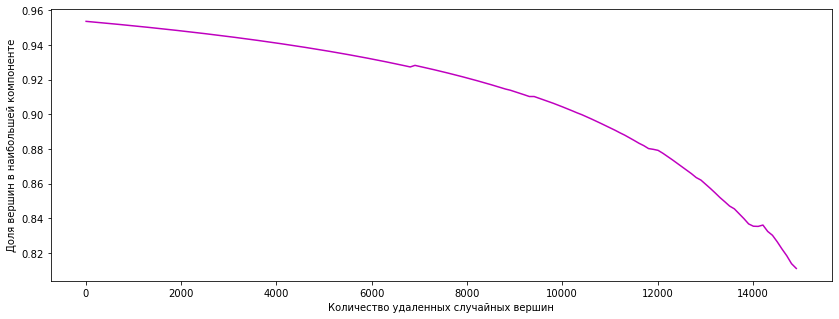

In [61]:
%%time

number_of_removing = np.arange(10, 15000, 100)
props = []
for n in number_of_removing:
    removing_nodes = G.selection(x=n,
                                 most_degree=True)
    tmp_set = nodes_in_largest_component - removing_nodes
    proportion = len(tmp_set) / (G.nodes_count-n)
    props.append(proportion)
    
#     print(f'После удаления {n} случайных вершин:')
#     print(f'--- осталось {len(tmp_set)} вершин')
#     print(f'--- доля {round(proportion, 5)}')
#     print()
    ## спросить: мы считаем долю в модифицированном графе? То есть в том графе, из которого удалили вершины?
    ## или же нужно считать долю в исходном графе?
    

plt.figure(figsize=(14, 5))
plt.plot(number_of_removing, props, 'm')
plt.xlabel('Количество удаленных случайных вершин')
plt.ylabel('Доля вершин в наибольшей компоненте')

# Метрические характеристики графа: диаметр, радиус и 90 процентиль (approximation)

In [ ]:
%%time

diam_results = []
radius_results = []
for i in range(5):
    d = diameter_approximate(graph=largest_component,
                             number=500)
    r = radius_approximate(graph=largest_component,
                             number=500)
    print(f'На {i}-ой итерации:')
    print(f'------ оценка диаметра: {d[0]}')
    print(f'------ оценка радиуса: {r[0]}')
    
    diam_results.append(d[0])
    radius_results.append(r[0])

На основе найденных показателей, вычислим эмпирический радиус и эмпирический диаметр графа

In [ ]:
print(f'Диаметр графа (среднее значение): {sum(diam_results) / len(diam_results)}')
print(f'Радиус графа (среднее значение): {sum(radius_results) / len(radius_results)}')

# Функция вероятности для степени узла в графе
Минимальная, максимальная, средняя степень узла в графе. Надо построить функцию вероятности (можно в виде гистограммы относительных частот)